This notebook shows publishing data and images over mqtt

In [1]:
import sys
sys.version

'3.5.3 (default, Sep 27 2018, 17:25:39) \n[GCC 6.3.0 20170516]'

Remember we are on 3.5.3

In [2]:
import paho.mqtt.client as mqtt
import paho.mqtt.publish as publish 
import time
import os

### MQTT 
broker = "localhost"
port = 1883
test_topic ='test'

In [3]:
def on_connect(client, userdata, flags, rc):
    print("CONNACK received with code {}".format(rc))
    if rc==0:
        print("connected OK")
    else:
        print("Bad connection Returned code=",rc)

def on_publish(client, userdata, mid):
    print("mid: "+str(mid))        

# The callback for when a PUBLISH message is received from the server.
def on_message(client, userdata, msg):
    print(msg.topic+" "+str(msg.payload))

In [4]:
client = mqtt.Client()
client.on_connect = on_connect
client.on_message = on_message
client.on_publish = on_publish

#client.username_pw_set(username, password)
client.connect(broker, port=port)
client.loop_start()

In [5]:
client.publish(test_topic, 'some_data')

CONNACK received with code 0
connected OK
mid: 1


See message on broker

## Publish image
We can open an image and post the bytes to an appropriate mqtt camera

In [6]:
!ls *.jpg

frame.jpg


In [7]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
img_file = 'frame.jpg'

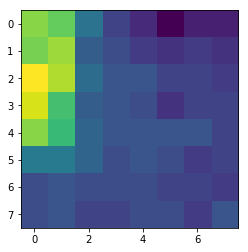

In [9]:
image = Image.open(img_file)
plt.imshow(image);

In [10]:
camera_topic = 'camera/'

with open(img_file, 'rb') as file:
    bytes_read = file.read()  
    byte_array = bytearray(bytes_read)
    client.publish(camera_topic, byte_array)

mid: 2


We can now view the image on the mqtt camera